# Driver Kmeans clustering

This is a dataset of drivers using Lithium ion batteries obtained from Lithion Power corp. The company rents batteries to electric vehicle drivers who return the batteries after usage for charging.Our objective is to identify various types of drivers based on the cluster and incentivise them accordingly.The drivers or data points will be grouped according to the similarity of their features so that the variation between different clusters is high and variation within the cluster is minimal if not zero. 


In [1]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import scipy.stats as stats
import pandas as pd
import seaborn as sb
sb.set()
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.metrics import mean_squared_error as mse

In [2]:
#getting dataset
driver= pd.read_csv("C:\\Users\\sujoydutta\\Desktop\\Data analysis\\Python\\Datasets\\Clustering\\driver-data.csv")
driver.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [3]:
#seeing shape
driver.shape

(4000, 3)

In [4]:
#seeing datatypes
print(driver.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB
None


In [5]:
#summary statistics
driver.describe().round()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.0,4000.0
mean,3.423312e+09,76.0,11.0
std,1.155000e+03,53.0,14.0
min,3.423310e+09,16.0,0.0
25%,3.423311e+09,45.0,4.0
50%,3.423312e+09,53.0,6.0
75%,3.423313e+09,66.0,9.0
max,3.423314e+09,245.0,100.0


In [75]:
#setting number of clusters
kmeans=KMeans(n_clusters=2)
drivercl=driver.drop('id',axis=1)

In [76]:
#fitting the dataset
kmeans.fit(drivercl)

KMeans(n_clusters=2)

In [77]:
#seeing cluster centers
print(kmeans.cluster_centers_)

[[ 50.04763438   8.82875   ]
 [180.017075    18.29      ]]


In [78]:
#seeing labels
print(kmeans.labels_)

[0 0 0 ... 1 1 1]


In [79]:
#seeing numbers of points in each cluster
print(type(kmeans.labels_))
unique,counts= np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{0: 3200, 1: 800}


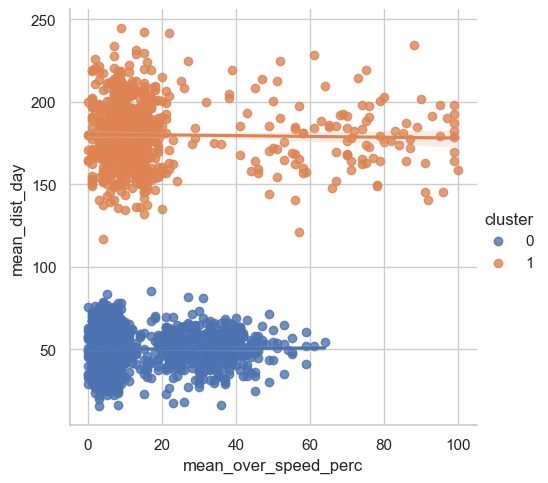

In [80]:
#plotting
drivercl['cluster'] = kmeans.labels_
sb.set_style('whitegrid')
sb.lmplot(data=drivercl,x='mean_over_speed_perc',y='mean_dist_day',
          hue='cluster')
          

**Finding**

There are two types of users for the batteries. The first group which consists of 80% of the users travel large distances over 150 KMS a day. They prefer to keep a distributed speed  ranging from 20 KM per hour to 100 KM per hour. The second type of users prefer a low speed range of 20 KM per hour to 40 Hour and travel less distances which is less than 100 KM. 
